[source](https://github.com/benalexkeen/Introduction-to-linear-programming)

## Introduction to Linear Programming with Python

In this set of notebooks we will be looking at some linear programming problems and how we can construct and solve these problems using the python linear programming package PuLP.

Let's start with a simple example:

We want to find the maximum solution to:

Z = 4x + 3y

This is known as our objective function. x and y in this equation are our decision variables.

In this example, the objective function is subject to the following constraints:

x ≥ 0

y ≥ 2

2y ≤ 25 - x

4y ≥ 2x - 8

y ≤ 2x - 5

We'll begin by graphing this problem


In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


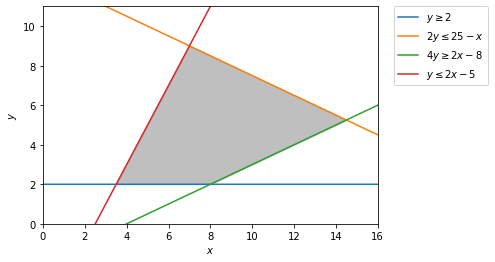

In [3]:

# Construct lines
# x > 0
x = np.linspace(0, 20, 2000)
# y >= 2
y1 = (x*0) + 2
# 2y <= 25 - x
y2 = (25-x)/2.0
# 4y >= 2x - 8 
y3 = (2*x-8)/4.0
# y <= 2x - 5 
y4 = 2 * x -5

# Make plot
plt.plot(x, y1, label=r'$y\geq2$')
plt.plot(x, y2, label=r'$2y\leq25-x$')
plt.plot(x, y3, label=r'$4y\geq 2x - 8$')
plt.plot(x, y4, label=r'$y\leq 2x-5$')
plt.xlim((0, 16))
plt.ylim((0, 11))
plt.xlabel(r'$x$')
plt.ylabel(r'$y$')

# Fill feasible region
y5 = np.minimum(y2, y4)
y6 = np.maximum(y1, y3)
plt.fill_between(x, y5, y6, where=y5>y6, color='grey', alpha=0.5)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

In [3]:
x = np.linspace(0, 20, 2000)
x

array([0.00000000e+00, 1.00050025e-02, 2.00100050e-02, ...,
       1.99799900e+01, 1.99899950e+01, 2.00000000e+01])

## see solution on example page

## Introduction to PuLP



In [2]:
import pulp

Instantiate the problem class, we'll name it "My LP problem" and we're looking for an optimal maximum so we use LpMaximize

In [5]:
my_lp_problem = pulp.LpProblem("My_LP_Problem", pulp.LpMaximize)

Decision variables using the LpVariable class. In our example, x had a lower bound of 0 and y had a lower bound of 2.

Upper bounds can be assigned using the upBound parameter.

In [6]:
x = pulp.LpVariable('x', lowBound=0, cat='Continuous')
y = pulp.LpVariable('y', lowBound=2, cat='Continuous')

The objective function and constraints are added using the += operator to our model.

The objective function is added first, then the individual constraints.

In [7]:
# Objective function
my_lp_problem += 4 * x + 3 * y, "Z"

In [8]:
# Constraints
my_lp_problem += 2 * y <= 25 - x
my_lp_problem += 4 * y >= 2 * x - 8
my_lp_problem += y <= 2 * x - 5

In [9]:
my_lp_problem

My_LP_Problem:
MAXIMIZE
4*x + 3*y + 0
SUBJECT TO
_C1: x + 2 y <= 25

_C2: - 2 x + 4 y >= -8

_C3: - 2 x + y <= -5

VARIABLES
x Continuous
2 <= y Continuous

----

PuLP supports open source linear programming solvers such as CBC and GLPK, as well as commercial solvers such as Gurobi and IBM's CPLEX.

The default solver is CBC, which comes packaged with PuLP upon installation.

For most applications, the open source CBC from [COIN-OR](https://www.coin-or.org/projects/) will be enough for most simple linear programming optimisation algorithms.

In [10]:
my_lp_problem.solve()
pulp.LpStatus[my_lp_problem.status]

'Optimal'

We have also checked the status of the solver, there are 5 status codes:

* Not Solved: Status prior to solving the problem.
* Optimal: An optimal solution has been found.
* Infeasible: There are no feasible solutions (e.g. if you set the constraints x <= 1 and x >=2).
* Unbounded: The constraints are not bounded, maximising the solution will tend towards infinity (e.g. if the only constraint was x >= 3).
* Undefined: The optimal solution may exist but may not have been found.

We can now view our maximal variable values and the maximum value of Z.

We can use the varValue method to retrieve the values of our variables x and y, and the pulp.value function to view the maximum value of the objective function.

In [15]:
for variable in my_lp_problem.variables():
    print('{} = {}'.format(variable.name, variable.varValue))

x = 14.5
y = 5.25


In [17]:
print(pulp.value(my_lp_problem.objective))

73.75


## Two real world problems

### Resourcing Problem

We're consulting for a boutique car manufacturer, producing luxury cars.

They run on one month (30 days) cycles, we have one cycle to show we can provide value.

There is one robot, 2 engineers and one detailer in the factory. The detailer has some holiday off, so only has 21 days available.

The 2 cars need different time with each resource:

Robot time: Car A - 3 days; Car B - 4 days.

Engineer time: Car A - 5 days; Car B - 6 days.

Detailer time: Car A - 1.5 days; Car B - 3 days.

Car A provides €30,000 profit, whilst Car B offers €45,000 profit.

At the moment, they produce 4 of each cars per month, for €300,000 profit. Not bad at all, but we think we can do better for them.

This can be modelled as follows:

Maximise

Profit = 30,000A + 45,000B

Subject to:

A ≥ 0

B ≥ 0

3A + 4B ≤ 30

5A + 6B ≤ 60

1.5A + 3B ≤ 21

In [18]:
# Instantiate our problem class
model = pulp.LpProblem("Profit maximising problem", pulp.LpMaximize)

Unlike our previous problem, the decision variables in this case won't be continuous (We can't sell half a car!), so the category is integer.

In [19]:
A = pulp.LpVariable('A', lowBound=0, cat='Integer')
B = pulp.LpVariable('B', lowBound=0, cat='Integer')

In [20]:
# Objective function
model += 30000 * A + 45000 * B, "Profit"

In [21]:
# Constraints
model += 3 * A + 4 * B <= 30
model += 5 * A + 6 * B <= 60
model += 1.5 * A + 3 * B <= 21

In [22]:
# Solve our problem
model.solve()
pulp.LpStatus[model.status]

'Optimal'

In [24]:
# Print our decision variable values
print("Production of Car A = {}".format(A.varValue))
print("Production of Car B = {}".format(B.varValue))

Production of Car A = 2.0
Production of Car B = 6.0


In [25]:
# Print our objective function value
print(pulp.value(model.objective))

330000.0


### Problem \#2: Blending problem

We're going to make some sausages!

We have the following ingredients available to us:

|Ingredient|Cost|Availability| 
|-----|-------|------| 
|Pork|\\$4.32|30| 
|Wheat|\\$2.46|20| 
|Starch|\\$1.86|17|

We'll make 2 types of sausage:

Economy (>40% Pork) <br>
Premium (>60% Pork) <br>
One sausage is 50 grams (0.05 kg) <br>

According to government regulations, the most starch we can use in our sausages is 25%

We have a contract with a butcher, and have already purchased 23 kg pork, that will go bad if it's not used.

We have a demand for 350 economy sausages and 500 premium sausages.

We need to figure out how to most cost effectively blend our sausages.

Let's model our problem

$p_e$ = Pork in the economy sausages (kg) <br>
$w_e$ = Wheat in the economy sausages (kg) <br>
$s_e$ = Starch in the economy sausages (kg) <br>
$p_p$ = Pork in the premium sausages (kg) <br>
$w_p$ = Wheat in the premium sausages (kg) <br>
$s_p$ = Starch in the premium sausages (kg) <br>

We want to minimise costs such that:

Cost $= 0.72(p_e + p_p) + 0.41(w_e + w_p) + 0.31(s_e + s_p)$

With the following constraints:

$p_e + w_e + s_e = 350 * 0.05$ <br>
$p_p + w_p + s_p = 500 * 0.05$ <br>
$p_e ≥ 0.4(p_e + w_e + s_e)$ <br>
$p_p ≥ 0.6(p_p + w_p + s_p)$ <br>
$s_e ≤ 0.25(p_e + w_e + s_e)$ <br>
$s_p ≤ 0.25(p_p + w_p + s_p)$ <br>
$p_e + p_p ≤ 30$ <br>
$w_e + w_p ≤ 20$ <br>
$s_e + s_p ≤ 17$ <br>
$p_e + p_p ≥ 23$ <br>

In [26]:
# Instantiate our problem class
model = pulp.LpProblem("Cost minimising blending problem", pulp.LpMinimize)

Here we have 6 decision variables, we could name them individually but this wouldn't scale up if we had hundreds/thousands of variables (you don't want to be entering all of these by hand multiple times).

We'll create a couple of lists from which we can create tuple indices.

In [27]:
# Construct our decision variable lists
sausage_types = ['economy', 'premium']
ingredients = ['pork', 'wheat', 'starch']

Each of these decision variables will have similar characteristics (lower bound of 0, continuous variables). Therefore we can use PuLP's LpVariable object's dict functionality, we can provide our tuple indices.

These tuples will be keys for the ing_weight dict of decision variables

In [28]:
ing_weight = pulp.LpVariable.dicts("weight kg",
                                     ((i, j) for i in sausage_types for j in ingredients),
                                     lowBound=0,
                                     cat='Continuous')

In [29]:
# Objective Function
model += (
    pulp.lpSum([
        4.32 * ing_weight[(i, 'pork')]
        + 2.46 * ing_weight[(i, 'wheat')]
        + 1.86 * ing_weight[(i, 'starch')]
        for i in sausage_types])
)

In [30]:
# Constraints
# 350 economy and 500 premium sausages at 0.05 kg
model += pulp.lpSum([ing_weight['economy', j] for j in ingredients]) == 350 * 0.05
model += pulp.lpSum([ing_weight['premium', j] for j in ingredients]) == 500 * 0.05

# Economy has >= 40% pork, premium >= 60% pork
model += ing_weight['economy', 'pork'] >= (
    0.4 * pulp.lpSum([ing_weight['economy', j] for j in ingredients]))

model += ing_weight['premium', 'pork'] >= (
    0.6 * pulp.lpSum([ing_weight['premium', j] for j in ingredients]))

# Sausages must be <= 25% starch
model += ing_weight['economy', 'starch'] <= (
    0.25 * pulp.lpSum([ing_weight['economy', j] for j in ingredients]))

model += ing_weight['premium', 'starch'] <= (
    0.25 * pulp.lpSum([ing_weight['premium', j] for j in ingredients]))

# We have at most 30 kg of pork, 20 kg of wheat and 17 kg of starch available
model += pulp.lpSum([ing_weight[i, 'pork'] for i in sausage_types]) <= 30
model += pulp.lpSum([ing_weight[i, 'wheat'] for i in sausage_types]) <= 20
model += pulp.lpSum([ing_weight[i, 'starch'] for i in sausage_types]) <= 17

# We have at least 23 kg of pork to use up
model += pulp.lpSum([ing_weight[i, 'pork'] for i in sausage_types]) >= 23

In [31]:
# Solve our problem
model.solve()
pulp.LpStatus[model.status]

'Optimal'

In [32]:
for var in ing_weight:
    var_value = ing_weight[var].varValue
    print("The weight of {0} in {1} sausages is {2} kg".format(var[1], var[0], var_value))

The weight of pork in economy sausages is 7.0 kg
The weight of wheat in economy sausages is 6.125 kg
The weight of starch in economy sausages is 4.375 kg
The weight of pork in premium sausages is 16.0 kg
The weight of wheat in premium sausages is 2.75 kg
The weight of starch in premium sausages is 6.25 kg


In [33]:
total_cost = pulp.value(model.objective)

print("The total cost is €{} for 350 economy sausages and 500 premium sausages".format(round(total_cost, 2)))

The total cost is €140.96 for 350 economy sausages and 500 premium sausages


In this example, we'll be solving a scheduling problem. We have 2 offshore production plants in 2 locations and an estimated demand for our products.

We want to produce a schedule of production from both plants that meets our demand with the lowest cost.

A factory can be in 2 states:

Off - Producing zero units <br>
On - Producing between its minimum and maximum production capacities <br>

Both factories have fixed costs, that are incurred as long as the factory is on, and variable costs, a cost per unit of production. These vary month by month.

We also know that factory B is down for maintenance in month 5.

We'll start by importing our data.

The data is imported into a multi-index pandas DataFrame using 'Month' and 'Factory' as our index columns.

In [34]:
import pandas as pd
import pulp

In [40]:
# data are here:https://docs.google.com/spreadsheets/d/1KTZtJmWeg-kMzsAPeQS25VNeJMFf2lYT9t2aj4nPkfI/edit#gid=0

factories = pd.read_csv('factories.csv', index_col=['Month', 'Factory'],header=0)
factories

Max_Capacity  Min_Capacity  Variable_Costs  Fixed_Costs
Month Factory                                                         
1     A              100000         20000              10          500
      B               50000         20000               5          600
2     A              110000         20000              11          500
      B               55000         20000               4          600
3     A              120000         20000              12          500
      B               60000         20000               3          600
4     A              145000         20000               9          500
      B              100000         20000               5          600
5     A              160000         20000               8          500
      B                   0             0               0            0
6     A              140000         20000               8          500
      B               70000         20000               6          600
7     A              155000         20000               5          500
      B               60000         20000               4          600
8     A              200000         20000               7          500
      B              100000         20000               6          600
9     A              210000         20000               9          500
      B              100000         20000               8          600
10    A              197000         20000              10          500
      B              100000         20000              11          600
11    A               80000         20000               8          500
      B              120000         20000              10          600
12    A              150000         20000               8          500
      B              150000         20000              12          600

In [43]:
demand = pd.read_csv('factory_demand.csv', index_col=['Month'],header=0)
demand

,Demand
Month,
1,120000
2,100000
3,130000
4,130000
5,140000
6,130000
7,150000
8,170000
9,200000


As we have fixed costs and variable costs, we'll need to model both production and the status of the factory i.e. whether it is on or off.

Production is modelled as an integer variable.

We have a value for production for each month for each factory, this is given by the tuples of our multi-index pandas DataFrame index.

In [44]:
production = pulp.LpVariable.dicts("production",
                                     ((month, factory) for month, factory in factories.index),
                                     lowBound=0,
                                     cat='Integer')

production

{(1, 'A'): production_(1,_'A'),
 (1, 'B'): production_(1,_'B'),
 (2, 'A'): production_(2,_'A'),
 (2, 'B'): production_(2,_'B'),
 (3, 'A'): production_(3,_'A'),
 (3, 'B'): production_(3,_'B'),
 (4, 'A'): production_(4,_'A'),
 (4, 'B'): production_(4,_'B'),
 (5, 'A'): production_(5,_'A'),
 (5, 'B'): production_(5,_'B'),
 (6, 'A'): production_(6,_'A'),
 (6, 'B'): production_(6,_'B'),
 (7, 'A'): production_(7,_'A'),
 (7, 'B'): production_(7,_'B'),
 (8, 'A'): production_(8,_'A'),
 (8, 'B'): production_(8,_'B'),
 (9, 'A'): production_(9,_'A'),
 (9, 'B'): production_(9,_'B'),
 (10, 'A'): production_(10,_'A'),
 (10, 'B'): production_(10,_'B'),
 (11, 'A'): production_(11,_'A'),
 (11, 'B'): production_(11,_'B'),
 (12, 'A'): production_(12,_'A'),
 (12, 'B'): production_(12,_'B')}

Factory status is modelled as a binary variable. It will have a value of 1 if the factory is on and a value of 0 when the factory is off.

Binary variables are the same as integer variables but constrained to be >= 0 and <=1

Again this has a value for each month for each factory, again given by the index of our DataFrame

In [45]:
factory_status = pulp.LpVariable.dicts("factory_status",
                                     ((month, factory) for month, factory in factories.index),
                                     cat='Binary')
factory_status

{(1, 'A'): factory_status_(1,_'A'),
 (1, 'B'): factory_status_(1,_'B'),
 (2, 'A'): factory_status_(2,_'A'),
 (2, 'B'): factory_status_(2,_'B'),
 (3, 'A'): factory_status_(3,_'A'),
 (3, 'B'): factory_status_(3,_'B'),
 (4, 'A'): factory_status_(4,_'A'),
 (4, 'B'): factory_status_(4,_'B'),
 (5, 'A'): factory_status_(5,_'A'),
 (5, 'B'): factory_status_(5,_'B'),
 (6, 'A'): factory_status_(6,_'A'),
 (6, 'B'): factory_status_(6,_'B'),
 (7, 'A'): factory_status_(7,_'A'),
 (7, 'B'): factory_status_(7,_'B'),
 (8, 'A'): factory_status_(8,_'A'),
 (8, 'B'): factory_status_(8,_'B'),
 (9, 'A'): factory_status_(9,_'A'),
 (9, 'B'): factory_status_(9,_'B'),
 (10, 'A'): factory_status_(10,_'A'),
 (10, 'B'): factory_status_(10,_'B'),
 (11, 'A'): factory_status_(11,_'A'),
 (11, 'B'): factory_status_(11,_'B'),
 (12, 'A'): factory_status_(12,_'A'),
 (12, 'B'): factory_status_(12,_'B')}

We instantiate our model and use LpMinimize as the aim is to minimise costs.

In [46]:
model = pulp.LpProblem("Cost minimising scheduling problem", pulp.LpMinimize)

/opt/conda/lib/python3.7/site-packages/pulp/pulp.py:1114: UserWarning: Spaces are not permitted in the name. Converted to '_'
  warnings.warn("Spaces are not permitted in the name. Converted to '_'")


In [47]:
model

Cost_minimising_scheduling_problem:
MINIMIZE
None
VARIABLES

In our objective function we include our 2 costs:

Our variable costs is the product of the variable costs per unit of production
Our fixed costs is the factory status - 1 (on) or 0 (off) - multiplied by the fixed cost of production

In [48]:
model += pulp.lpSum(
    [production[month, factory] * factories.loc[(month, factory), 'Variable_Costs'] for month, factory in factories.index]
    + [factory_status[month, factory] * factories.loc[(month, factory), 'Fixed_Costs'] for month, factory in factories.index]
)

In [49]:
model

Cost_minimising_scheduling_problem:
MINIMIZE
500*factory_status_(1,_'A') + 600*factory_status_(1,_'B') + 500*factory_status_(10,_'A') + 600*factory_status_(10,_'B') + 500*factory_status_(11,_'A') + 600*factory_status_(11,_'B') + 500*factory_status_(12,_'A') + 600*factory_status_(12,_'B') + 500*factory_status_(2,_'A') + 600*factory_status_(2,_'B') + 500*factory_status_(3,_'A') + 600*factory_status_(3,_'B') + 500*factory_status_(4,_'A') + 600*factory_status_(4,_'B') + 500*factory_status_(5,_'A') + 500*factory_status_(6,_'A') + 600*factory_status_(6,_'B') + 500*factory_status_(7,_'A') + 600*factory_status_(7,_'B') + 500*factory_status_(8,_'A') + 600*factory_status_(8,_'B') + 500*factory_status_(9,_'A') + 600*factory_status_(9,_'B') + 10*production_(1,_'A') + 5*production_(1,_'B') + 10*production_(10,_'A') + 11*production_(10,_'B') + 8*production_(11,_'A') + 10*production_(11,_'B') + 8*production_(12,_'A') + 12*production_(12,_'B') + 11*production_(2,_'A') + 4*production_(2,_'B') + 12*prod

We build up our constraints

In [50]:
# Production in any month must be equal to demand
months = demand.index
for month in months:
    model += production[(month, 'A')] + production[(month, 'B')] == demand.loc[month, 'Demand']

An issue we run into here is that in linear programming we can't use conditional constraints.

For example we can't add to our model that if the factory is off factory status must be 0, and if it is on factory status must be 1. Before we've solved our model though, we don't know if the factory will be on or off in a given month.

In this case, construct constraints that have minimum and maximum capacities that are constant variables, which we multiply by the factory status.

Now, either factory status is 0 and:

min_production >= 0 <br>
max_production <= 0 <br>

Or factory status is 1 and:

min_production >= min_capacity <br>
max_production <= max_capacity <br>

(In some cases we can use linear constraints to model conditional statements, we'll explore this in part 6)

In [51]:
# Production in any month must be between minimum and maximum capacity, or zero.
for month, factory in factories.index:
    min_production = factories.loc[(month, factory), 'Min_Capacity']
    max_production = factories.loc[(month, factory), 'Max_Capacity']
    model += production[(month, factory)] >= min_production * factory_status[month, factory]
    model += production[(month, factory)] <= max_production * factory_status[month, factory]

In [52]:
model


Cost_minimising_scheduling_problem:
MINIMIZE
500*factory_status_(1,_'A') + 600*factory_status_(1,_'B') + 500*factory_status_(10,_'A') + 600*factory_status_(10,_'B') + 500*factory_status_(11,_'A') + 600*factory_status_(11,_'B') + 500*factory_status_(12,_'A') + 600*factory_status_(12,_'B') + 500*factory_status_(2,_'A') + 600*factory_status_(2,_'B') + 500*factory_status_(3,_'A') + 600*factory_status_(3,_'B') + 500*factory_status_(4,_'A') + 600*factory_status_(4,_'B') + 500*factory_status_(5,_'A') + 500*factory_status_(6,_'A') + 600*factory_status_(6,_'B') + 500*factory_status_(7,_'A') + 600*factory_status_(7,_'B') + 500*factory_status_(8,_'A') + 600*factory_status_(8,_'B') + 500*factory_status_(9,_'A') + 600*factory_status_(9,_'B') + 10*production_(1,_'A') + 5*production_(1,_'B') + 10*production_(10,_'A') + 11*production_(10,_'B') + 8*production_(11,_'A') + 10*production_(11,_'B') + 8*production_(12,_'A') + 12*production_(12,_'B') + 11*production_(2,_'A') + 4*production_(2,_'B') + 12*prod

In [53]:
# Factory B is off in May
model += factory_status[5, 'B'] == 0
model += production[5, 'B'] == 0

We then solve the model

In [54]:
model.solve()
pulp.LpStatus[model.status]

'Optimal'

In [56]:
factory_status

{(1, 'A'): factory_status_(1,_'A'),
 (1, 'B'): factory_status_(1,_'B'),
 (2, 'A'): factory_status_(2,_'A'),
 (2, 'B'): factory_status_(2,_'B'),
 (3, 'A'): factory_status_(3,_'A'),
 (3, 'B'): factory_status_(3,_'B'),
 (4, 'A'): factory_status_(4,_'A'),
 (4, 'B'): factory_status_(4,_'B'),
 (5, 'A'): factory_status_(5,_'A'),
 (5, 'B'): factory_status_(5,_'B'),
 (6, 'A'): factory_status_(6,_'A'),
 (6, 'B'): factory_status_(6,_'B'),
 (7, 'A'): factory_status_(7,_'A'),
 (7, 'B'): factory_status_(7,_'B'),
 (8, 'A'): factory_status_(8,_'A'),
 (8, 'B'): factory_status_(8,_'B'),
 (9, 'A'): factory_status_(9,_'A'),
 (9, 'B'): factory_status_(9,_'B'),
 (10, 'A'): factory_status_(10,_'A'),
 (10, 'B'): factory_status_(10,_'B'),
 (11, 'A'): factory_status_(11,_'A'),
 (11, 'B'): factory_status_(11,_'B'),
 (12, 'A'): factory_status_(12,_'A'),
 (12, 'B'): factory_status_(12,_'B')}

Let's take a look at the optimal production schedule output for each month from each factory. For ease of viewing we'll output the data to a pandas DataFrame.

In [57]:
output = []
for month, factory in production:
    var_output = {
        'Month': month,
        'Factory': factory,
        'Production': production[(month, factory)].varValue,
        'Factory Status': factory_status[(month, factory)].varValue
    }
    output.append(var_output)
output_df = pd.DataFrame.from_records(output).sort_values(['Month', 'Factory'])
output_df.set_index(['Month', 'Factory'], inplace=True)
output_df

Production  Factory Status
Month Factory                            
1     A           70000.0             1.0
      B           50000.0             1.0
2     A           45000.0             1.0
      B           55000.0             1.0
3     A           70000.0             1.0
      B           60000.0             1.0
4     A           30000.0             1.0
      B          100000.0             1.0
5     A          140000.0             1.0
      B               0.0             0.0
6     A           60000.0             1.0
      B           70000.0             1.0
7     A           90000.0             1.0
      B           60000.0             1.0
8     A           70000.0             1.0
      B          100000.0             1.0
9     A          100000.0             1.0
      B          100000.0             1.0
10    A          190000.0             1.0
      B               0.0             0.0
11    A           80000.0             1.0
      B           60000.0             1.0
12    A          100000.0             1.0
      B               0.0             0.0

In [59]:
# Print our objective function value (Total Costs)
print(pulp.value(model.objective))

12906400.0


# Problems from Nash and Sofer, Chapter 5

### page 95 

minimize $z = - x_1 - 2 x_2$ <br>
subject to $-2x_1 + x_2 \leq 2$ <br>
$-x_1 + 2x_2 \leq 7$ <br>
$x_1 \leq 3$ <br>
$x_1,x_2 \geq 0$

In [78]:
my_lp_problem = pulp.LpProblem("Nash_and_Sofer_p95", pulp.LpMinimize)

In [79]:
# decision variables
x1 = pulp.LpVariable('x1', lowBound=0,upBound=3,  cat='Continuous')
x2 = pulp.LpVariable('x2', lowBound=0, cat='Continuous')

In [80]:
# Objective function
my_lp_problem += -x1 - 2*x2, "z"

In [81]:
# Constraints
my_lp_problem += -2*x1+x2 <= 2
my_lp_problem += -x1+2*x2 <= 7

In [82]:
my_lp_problem

Nash_and_Sofer_p95:
MINIMIZE
-1*x1 + -2*x2 + 0
SUBJECT TO
_C1: - 2 x1 + x2 <= 2

_C2: - x1 + 2 x2 <= 7

VARIABLES
x1 <= 3 Continuous
x2 Continuous

In [83]:
my_lp_problem.solve()
pulp.LpStatus[my_lp_problem.status]

'Optimal'

In [84]:
for variable in my_lp_problem.variables():
    print('{} = {}'.format(variable.name, variable.varValue))

x1 = 3.0
x2 = 5.0


In [85]:
print(pulp.value(my_lp_problem.objective))

-13.0


### Unbounded. Page 103

minimize $z = -x_1 - 2 x_2$ <br>
s.t. $-x_1 + x_2 \leq 2$ <br>
$-2x_1 + x_2 \leq 1$ <br>
$x_1, x_2 \geq 0$


In [86]:
my_lp_problem = pulp.LpProblem("Nash_and_Sofer_p103", pulp.LpMinimize)

In [87]:
# decision variables
x1 = pulp.LpVariable('x1', lowBound=0,  cat='Continuous')
x2 = pulp.LpVariable('x2', lowBound=0, cat='Continuous')

In [88]:
# Objective function
my_lp_problem += -x1 - 2*x2, "z"

In [89]:
# Constraints
my_lp_problem += -x1+x2 <= 2
my_lp_problem += -2*x1+x2 <= 1

In [90]:
my_lp_problem

Nash_and_Sofer_p103:
MINIMIZE
-1*x1 + -2*x2 + 0
SUBJECT TO
_C1: - x1 + x2 <= 2

_C2: - 2 x1 + x2 <= 1

VARIABLES
x1 Continuous
x2 Continuous

In [91]:
my_lp_problem.solve()
pulp.LpStatus[my_lp_problem.status]

'Unbounded'

In [92]:
for variable in my_lp_problem.variables():
    print('{} = {}'.format(variable.name, variable.varValue))

x1 = 0.0
x2 = 0.0


In [93]:
print(pulp.value(my_lp_problem.objective))

0.0


### Multiple solutions. Page 117

minimize $z = -x_1 $ <br>
s.t. $-2*x_1 + x_2 \leq 2$ <br>
$-x_1 + x_2 \leq 3$ <br>
$x_1 \leq 3$ <br>
$x_1, x_2 \geq 0$


In [95]:
my_lp_problem = pulp.LpProblem("Nash_and_Sofer_p117", pulp.LpMinimize)

# decision variables
x1 = pulp.LpVariable('x1', lowBound=0,upBound=3 , cat='Continuous')
x2 = pulp.LpVariable('x2', lowBound=0, cat='Continuous')

# Objective function
my_lp_problem += -x1, "z"

# Constraints
my_lp_problem += -2*x1+x2 <= 2
my_lp_problem += -x1+x2 <= 3

my_lp_problem

Nash_and_Sofer_p117:
MINIMIZE
-1*x1 + 0
SUBJECT TO
_C1: - 2 x1 + x2 <= 2

_C2: - x1 + x2 <= 3

VARIABLES
x1 <= 3 Continuous
x2 Continuous

In [98]:
my_lp_problem.solve()
pulp.LpStatus[my_lp_problem.status]

'Optimal'

In [99]:
for variable in my_lp_problem.variables():
    print('{} = {}'.format(variable.name, variable.varValue))
    
print(pulp.value(my_lp_problem.objective))

x1 = 3.0
x2 = 0.0
-3.0


### Degenerate. Page 134

minimize $z = -x_1 - x_2 $ <br>
s.t. $x_1 + x_2 \leq 2$ <br>
$x_1 \leq 2$ <br>
$x_1, x_2 \geq 0$

In [100]:
my_lp_problem = pulp.LpProblem("Nash_and_Sofer_p134", pulp.LpMinimize)

# decision variables
x1 = pulp.LpVariable('x1', lowBound=0,upBound=2 , cat='Continuous')
x2 = pulp.LpVariable('x2', lowBound=0, cat='Continuous')

# Objective function
my_lp_problem += -x1 - x2, "z"

# Constraints
my_lp_problem += x1+x2 <= 2

my_lp_problem

Nash_and_Sofer_p134:
MINIMIZE
-1*x1 + -1*x2 + 0
SUBJECT TO
_C1: x1 + x2 <= 2

VARIABLES
x1 <= 2 Continuous
x2 Continuous

In [101]:
my_lp_problem.solve()
pulp.LpStatus[my_lp_problem.status]

'Optimal'

In [102]:
for variable in my_lp_problem.variables():
    print('{} = {}'.format(variable.name, variable.varValue))
    
print(pulp.value(my_lp_problem.objective))

x1 = 2.0
x2 = 0.0
-2.0


### No termination for Simplex. Page 136

minimize $z = -\frac{3}{4} x_1 + 150 x_2 - \frac{1}{50} x_3 + 6 x_4 $ <br>
s.t. $\frac{1}{4} x_1 - 60 x_2 - \frac{1}{25} x_3 + 9 x_4 \leq 0$ <br>
$\frac{1}{2} x_1 - 90 x_2 - \frac{1}{50} x_3 + 3 x_4 \leq 0$ <br>
$x_3 \leq 1$ <br>
$x_1, x_2, x_3, x_4 \geq 0$

In [105]:
my_lp_problem = pulp.LpProblem("Nash_and_Sofer_p136", pulp.LpMinimize)

# decision variables
x1 = pulp.LpVariable('x1', lowBound=0, cat='Continuous')
x2 = pulp.LpVariable('x2', lowBound=0, cat='Continuous')
x3 = pulp.LpVariable('x3', lowBound=0,upBound=1 , cat='Continuous')
x4 = pulp.LpVariable('x4', lowBound=0, cat='Continuous')

# Objective function
my_lp_problem += -3/4*x1 + 150*x2 - 1/50*x3 + 6*x4, "z"

# Constraints
my_lp_problem += 1/4*x1 - 60*x2 - 1/25 * x3 + 9* x4 <= 0
my_lp_problem += 1/2*x1 - 90*x2 - 1/50 * x3 + 3 * x4 <= 0

my_lp_problem

Nash_and_Sofer_p136:
MINIMIZE
-0.75*x1 + 150*x2 + -0.02*x3 + 6*x4 + 0.0
SUBJECT TO
_C1: 0.25 x1 - 60 x2 - 0.04 x3 + 9 x4 <= 0

_C2: 0.5 x1 - 90 x2 - 0.02 x3 + 3 x4 <= 0

VARIABLES
x1 Continuous
x2 Continuous
x3 <= 1 Continuous
x4 Continuous

In [106]:
my_lp_problem.solve()
pulp.LpStatus[my_lp_problem.status]

'Optimal'

In [107]:
for variable in my_lp_problem.variables():
    print('{} = {}'.format(variable.name, variable.varValue))
    
print(pulp.value(my_lp_problem.objective))

x1 = 0.04
x2 = 0.0
x3 = 1.0
x4 = 0.0
-0.05
